In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score


In [4]:
df=pd.read_csv("neo_v2.csv")
df


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [5]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [6]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


SPRAWDZENIE DUPLIKATOW

In [28]:
df.duplicated().sum()

7

In [9]:
df.isnull().sum()


id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [10]:
print(df.nunique())

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64


USUNIECIE NIEPOTRZEBNYCH DANYCH

In [11]:
df = df.drop(['id','name','orbiting_body','sentry_object'], axis=1)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


UNIKALNE ZMIENNE

In [30]:
print(df.nunique())

est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
absolute_magnitude     1638
hazardous                 2
dtype: int64


PODZIAL NA BEZPIECZNE I NIEBEZPIECZNE

In [32]:
df["hazardous"].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

PLOT

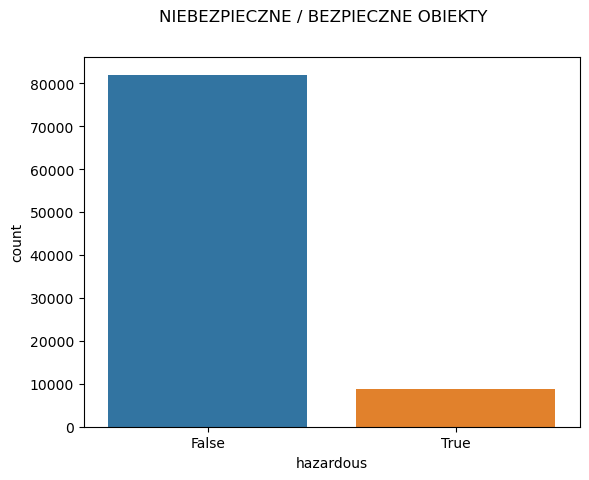

In [33]:
sns.countplot(x='hazardous',data=df)
plt.suptitle('NIEBEZPIECZNE / BEZPIECZNE OBIEKTY')
plt.rcParams['figure.figsize']=[4,4]
plt.show()

In [34]:
df


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


OPIS

In [35]:
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


KORELACJA

In [12]:
df.corr()


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000


<AxesSubplot:>

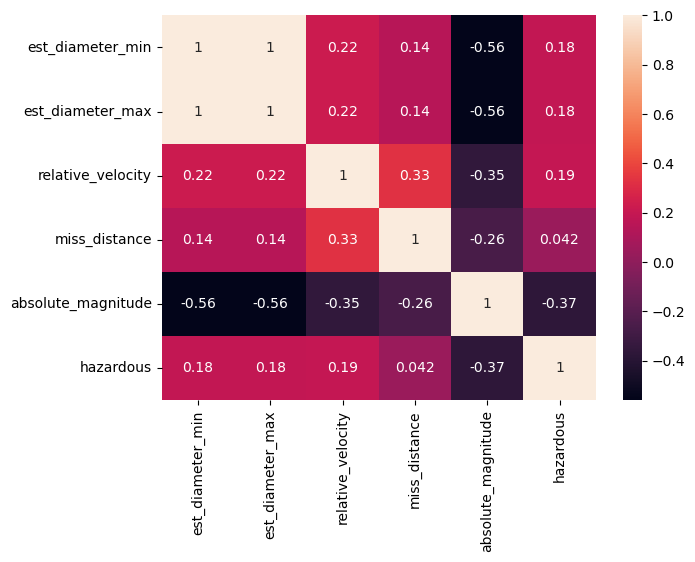

In [36]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)

SUBLOTY

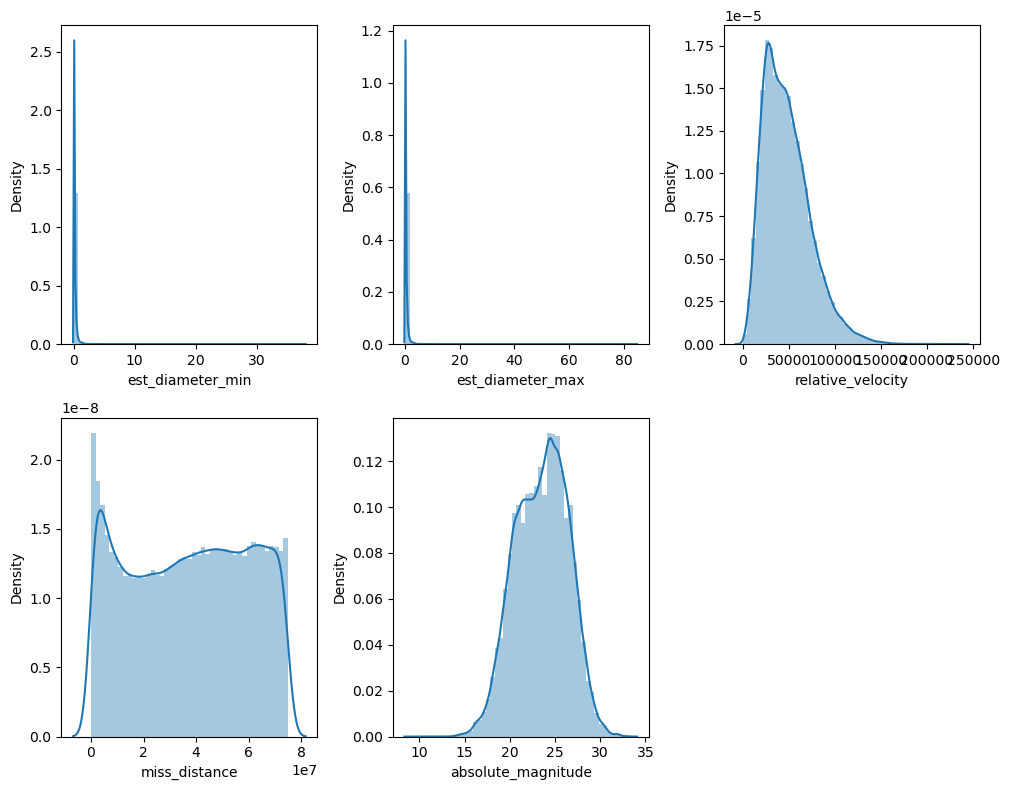

In [39]:
nums = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
rows=2
cols=3
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

PAIRPLOT

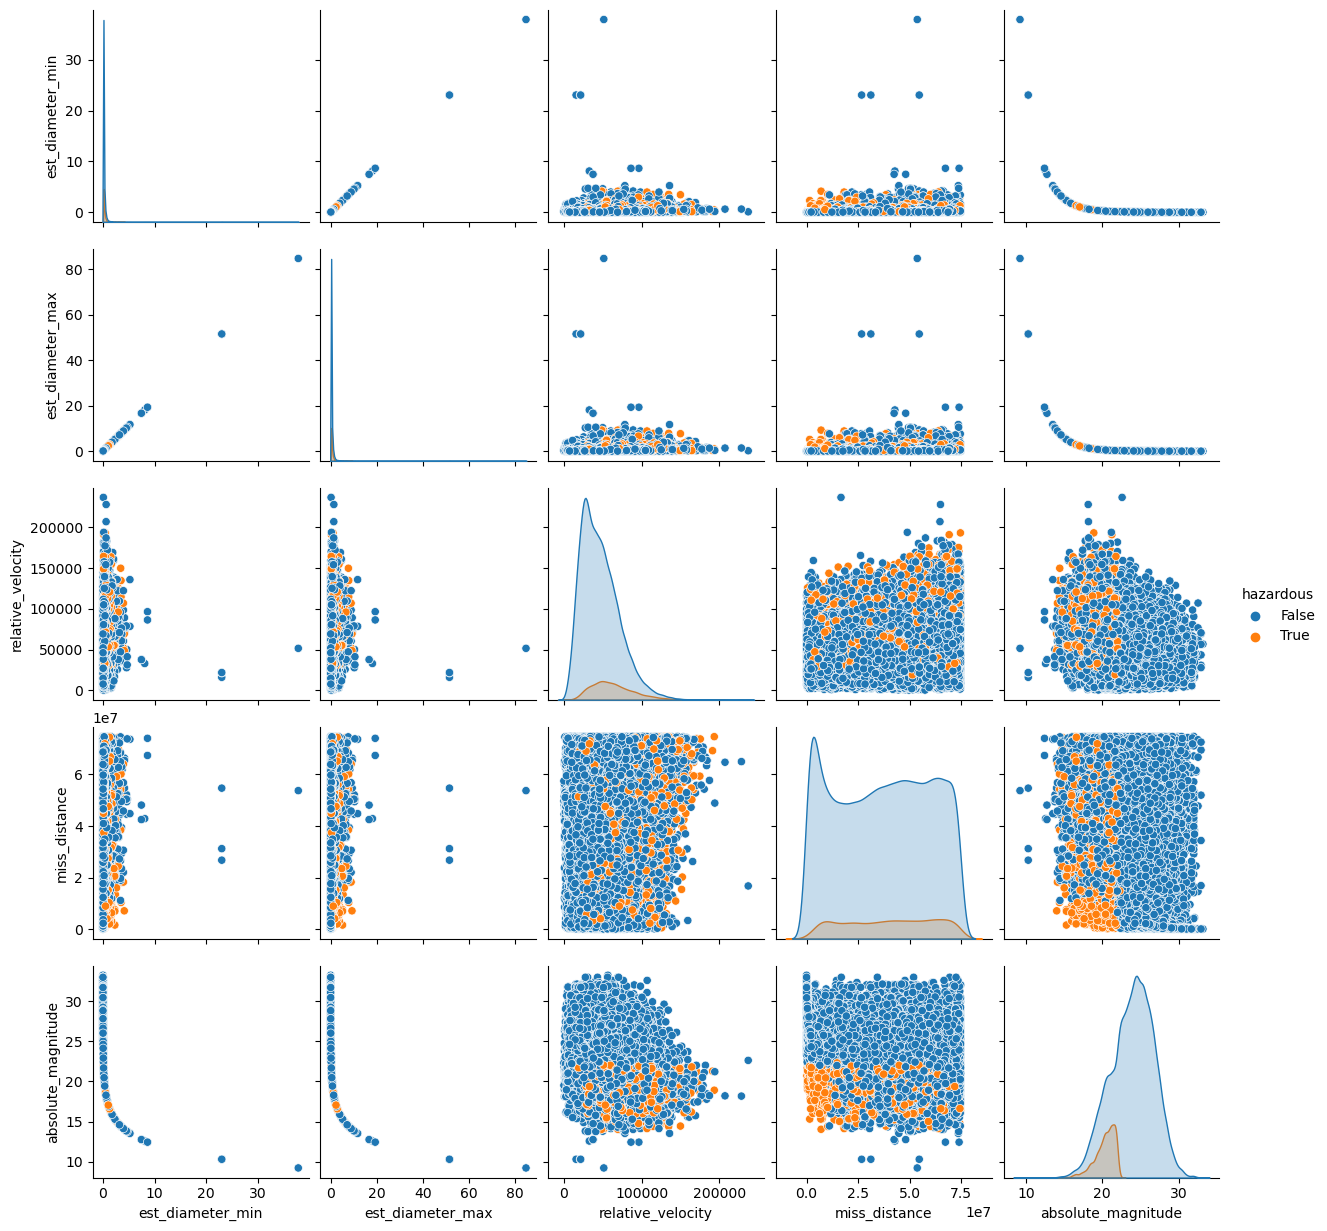

In [41]:
sns.pairplot(df, hue = "hazardous")

BOXPLOT

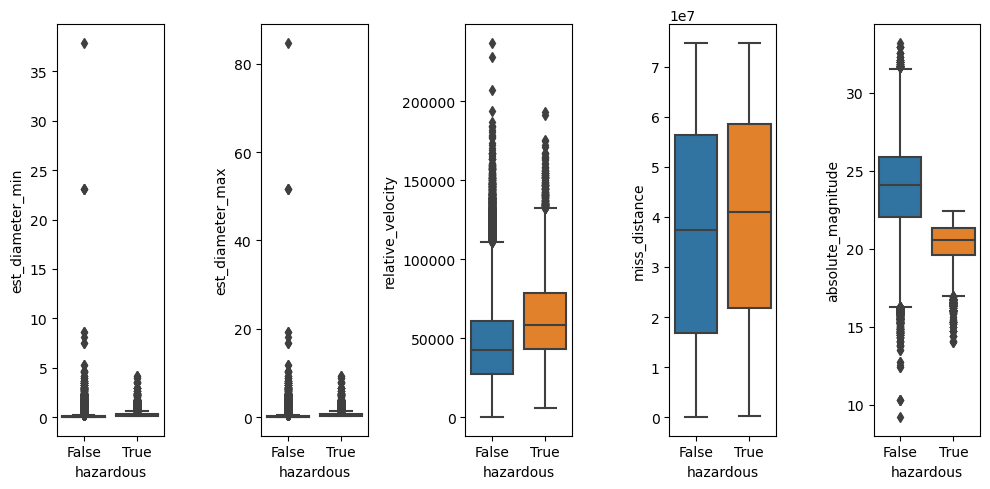

In [43]:
col=['est_diameter_min','est_diameter_max', 'relative_velocity','miss_distance',
        'absolute_magnitude']#numerical columns
rows=1
cols=5
counter=1
plt.rcParams['figure.figsize']=[10,5]
for i in col:
    plt.subplot(rows,cols,counter)
    sns.boxplot(x='hazardous',y=i,data=df)
    counter+=1
    
plt.tight_layout()
plt.show()


In [69]:
# PRZEZRZUCENIE DO WARTOSCI BINARNYCH
df['hazardous'] = [0 if entry==False else 1 for entry in df['hazardous']]

SPRAWDZENIE CLASS BIAS

In [70]:
haz = df['hazardous'].sum() / df['hazardous'].count()
print('% Hazardous Asteroids: ',round(haz,3))
print('% Non-Hazardous Asteroids: ',round(1-haz,3))

% Hazardous Asteroids:  0.097
% Non-Hazardous Asteroids:  0.903


ZMIANA DANYCH DO MODELU

In [71]:
X = np.array(df.drop('hazardous',axis=1))
Y = np.array(df['hazardous'])

STWORZENIE FUNKCJI DO SPRAWDZENIA DOKLADNOSCI MODELU

MODELOWANIE

In [84]:
X_train, test_x, y_train, test_y = train_test_split(df.drop(["hazardous"],axis=1),
                                                    df["hazardous"],
                                                    test_size=0.3,
                                                    shuffle=True)

In [48]:
model = RandomForestClassifier(random_state=0)
model.fit(train_x,train_y)

RandomForestClassifier(random_state=0)

In [49]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(train_y,model.predict(train_x))*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(test_y,model.predict(test_x))*100))
print("Precision Score : {:.2f} ".format(precision_score(test_y,model.predict(test_x))))
print("Recall Score    : {:.2f} ".format(recall_score(test_y,model.predict(test_x))))

Train Accuracy  : 100.00 %
Test Accuracy   : 91.57 %
Precision Score : 0.59 
Recall Score    : 0.41 


In [63]:
train_x.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
78896,0.046191,0.103286,37747.322329,6.785670e+07,23.80
42745,0.004023,0.008996,33664.434935,4.812483e+07,29.10
56381,0.160160,0.358129,106587.188218,3.950937e+07,21.10
52231,0.373727,0.835680,92338.811830,3.409175e+07,19.26
67855,0.664592,1.486072,93481.827818,4.630911e+07,18.01


In [64]:
train_y.head()

78896    False
42745    False
56381    False
52231     True
67855    False
Name: hazardous, dtype: bool

WYNIK (SCORE)

In [62]:
model.score(train_x,train_y)

1.0

In [74]:
from sklearn.linear_model import LogisticRegression

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [78]:
logmodel = LogisticRegression()
logmodel.fit(train_x,train_y)
logpreds = logmodel.predict(train_x)
print(classification_report(train_y,logpreds))

              precision    recall  f1-score   support

       False       0.90      1.00      0.95     57363
        True       0.00      0.00      0.00      6222

    accuracy                           0.90     63585
   macro avg       0.45      0.50      0.47     63585
weighted avg       0.81      0.90      0.86     63585

